In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn import linear_model

**Milestone 1**

Customer retention is a crucial factor in the success of commercial insurance businesses. Insurers constantly seek to understand the factors contributing to customer churn and develop strategies to retain their clients. The objective of this project is to predict customer retention in the commercial insurance sector using a dataset containing information on business policies. By developing a predictive model, I aim to help our insurance companies proactively identify and address potential cancellations, ultimately improving customer retention and increasing profitability. 

The business problem I will address is the high rate of customer churn in the commercial insurance industry. The goal is to develop a machine learning model that can predict the likelihood of policy cancellation based on the features available in the dataset, including policy label, effective date, expiration date, cancellation date, product code, subline code, street address, property city, property county name, property zip code, property state, written premium amount, total loss payments, and total reserve.

The target variable for our model is the "Cancellation Indicator," a binary variable derived from the cancellation date column. If a policy has a cancellation date, the indicator will be 1, signifying a cancellation. Otherwise, it will be 0, indicating that the policy is still active or expired naturally.

I will start by cleaning and preprocessing the dataset, handling missing values, and removing duplicate records. Categorical variables will be converted into numerical variables using appropriate encoding techniques. I will create new features, such as policy duration, time to cancellation, claim frequency, and loss ratio (total loss payments divided by written premium amount), which can provide additional insights into customer retention.

An extensive exploratory data analysis will be performed to understand the relationships between different variables and cancellations. I will identify patterns and trends in the data, such as geographical clusters of cancellations, seasonal variations, and correlations between specific product lines and cancellations.

In [37]:
# loading the dataset and showing the first 10 rows. 

df = pd.read_excel('C:/Users/mdyoung/OneDrive - Bankers Financial Corporation/Desktop/Bellevue/DSC550_T302_2235_1 - Data Mining/Week 6/CommercialPolicies.xlsx')
df.head(10)

,Policy Label,Effective Date,Expiration Date,Cancellation Date,Product Code,Subline Code,Street Address 1,Property City,Property County Name,Property Zip Code,Property State,Written Premium Amount,Total Loss Payments,Total Reserve
0,09-0004932682-6-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,603 7TH ST S STE 590,SAINT PETERSBURG,PINELLAS,33701,FL,357,0.0,0.0
1,09-0004932565-4-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,101 NORMANDY RD,CASSELBERRY,SEMINOLE,32707,FL,1749,0.0,0.0
2,09-0004932682-6-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,10281 SW 72ND ST STE 101,MIAMI,MIAMI-DADE,33173,FL,699,0.0,0.0
3,09-0004932779-7-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,1206 MANATEE AVE W,BRADENTON,MANATEE,34205,FL,4098,0.0,0.0
4,09-0004932682-6-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,5110 N HABANA AVE STE 2,TAMPA,HILLSBOROUGH,33614,FL,494,0.0,0.0
5,09-0004932626-8-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,1215 JACARANDA BLVD,VENICE,SARASOTA,34292,FL,525,0.0,0.0
6,09-0004932682-6-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,1305 S FORT HARRISON AVE,CLEARWATER,PINELLAS,33756,FL,820,0.0,0.0
7,09-0004932342-5-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,33 SW 2ND AVE STE 101,MIAMI,MIAMI-DADE,33130,FL,525,0.0,0.0
8,09-0004932682-6-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,525 PINE ISLAND RD STE A STE B,FORT MYERS,LEE,33903,FL,628,0.0,0.0
9,09-0004932182-1-02,2020-01-01,2021-01-01,NaT,BBOP,BPOP,7627 LITTLE RD,NEW PORT RICHEY,PASCO,34654,FL,2153,0.0,0.0


In [38]:
# Data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69567 entries, 0 to 69566
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Policy Label            69567 non-null  object        
 1   Effective Date          69567 non-null  datetime64[ns]
 2   Expiration Date         69567 non-null  datetime64[ns]
 3   Cancellation Date       4656 non-null   datetime64[ns]
 4   Product Code            69567 non-null  object        
 5   Subline Code            69567 non-null  object        
 6   Street Address 1        69567 non-null  object        
 7   Property City           69567 non-null  object        
 8   Property County Name    69567 non-null  object        
 9   Property Zip Code       69567 non-null  int64         
 10  Property State          69567 non-null  object        
 11  Written Premium Amount  69567 non-null  int64         
 12  Total Loss Payments     69567 non-null  float6

In [39]:
# Summary statistics

df.describe()

,Property Zip Code,Written Premium Amount,Total Loss Payments,Total Reserve
count,69567.000000,69567.000000,6.956700e+04,6.956700e+04
mean,38471.746115,2590.888223,1.786761e+03,2.409292e+02
std,13276.099128,3630.823615,2.686775e+04,7.439686e+03
min,27030.000000,-956.000000,0.000000e+00,0.000000e+00
25%,32765.000000,644.000000,0.000000e+00,0.000000e+00
50%,33487.000000,1344.000000,0.000000e+00,0.000000e+00
75%,34239.000000,3120.000000,0.000000e+00,0.000000e+00
max,78957.000000,98828.000000,1.945396e+06,1.127750e+06


In [40]:
# Calculate the Cancellation Indicator

df['Cancellation_Indicator'] = df['Cancellation Date'].notna().astype(int)

In [41]:
# Class distribution

print("\nClass distribution:")
print(df['Cancellation_Indicator'].value_counts(normalize=True))


Class distribution:
0    0.933072
1    0.066928
Name: Cancellation_Indicator, dtype: float64


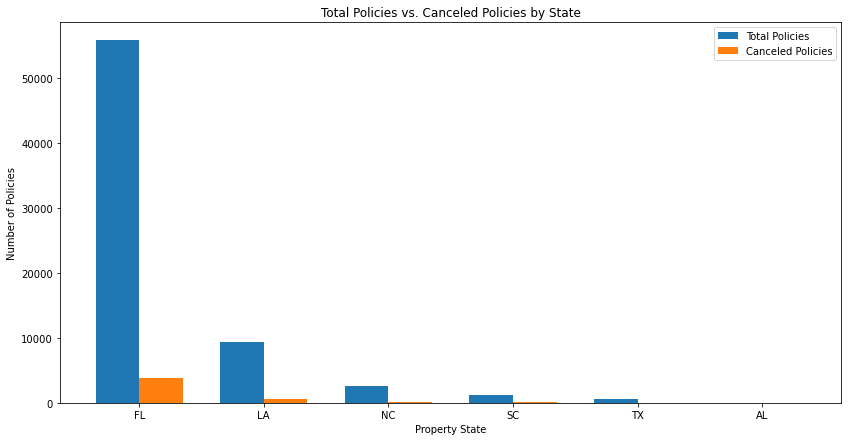

In [42]:
# To plot both graphs (all policies and canceled policies) together, I created a grouped bar chart 
# with grouped bars using pandas and matplotlib, displaying the count of all policies and canceled 
# policies for each state:


# Counting policies by state
policies_by_state = df['Property State'].value_counts()

# Filter rows with a cancellation
canceled_data = df[df['Cancellation_Indicator'] == 1]

# Count canceled policies by state
canceled_policies_by_state = canceled_data['Property State'].value_counts()

# Combine both Series into a single DataFrame
combined_data = pd.concat([policies_by_state, canceled_policies_by_state], axis=1, keys=['Total Policies', 'Canceled Policies'])
combined_data.fillna(0, inplace=True)

# Plotting the grouped bar chart
bar_width = 0.35
fig, ax = plt.subplots(figsize=(14, 7))
index = np.arange(len(combined_data))
rects1 = ax.bar(index, combined_data['Total Policies'], bar_width, label='Total Policies')
rects2 = ax.bar(index + bar_width, combined_data['Canceled Policies'], bar_width, label='Canceled Policies')
ax.set_xlabel('Property State')
ax.set_ylabel('Number of Policies')
ax.set_title('Total Policies vs. Canceled Policies by State')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_data.index)
ax.legend()
plt.show()

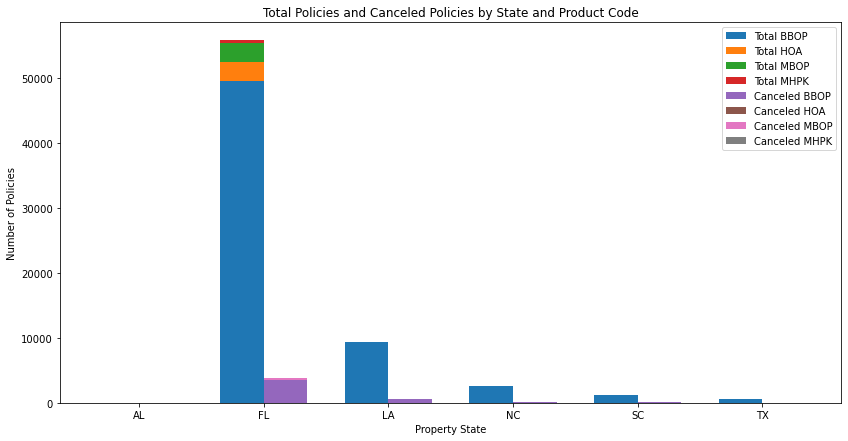

In [43]:
# Count policies by state and product code
policies_by_state_product = df.groupby(['Property State', 'Product Code']).size().unstack().fillna(0)

# Filter rows with a cancellation
canceled_data = df[df['Cancellation_Indicator'] == 1]

# Count canceled policies by state and product code
canceled_policies_by_state_product = canceled_data.groupby(['Property State', 'Product Code']).size().unstack().fillna(0)

# Reindex both DataFrames to have the same index (set of states)
all_states = policies_by_state_product.index.union(canceled_policies_by_state_product.index)
policies_by_state_product = policies_by_state_product.reindex(all_states).fillna(0)
canceled_policies_by_state_product = canceled_policies_by_state_product.reindex(all_states).fillna(0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))
index = np.arange(len(policies_by_state_product))
bar_width = 0.35

# Plotting total policies
bottom = np.zeros(len(policies_by_state_product))
for product_code in policies_by_state_product.columns:
    ax.bar(index, policies_by_state_product[product_code], bar_width, label=f'Total {product_code}', bottom=bottom)
    bottom += policies_by_state_product[product_code]

# Plotting canceled policies
bottom = np.zeros(len(canceled_policies_by_state_product))
for product_code in canceled_policies_by_state_product.columns:
    ax.bar(index + bar_width, canceled_policies_by_state_product[product_code], bar_width, label=f'Canceled {product_code}', bottom=bottom)
    bottom += canceled_policies_by_state_product[product_code]
ax.set_xlabel('Property State')
ax.set_ylabel('Number of Policies')
ax.set_title('Total Policies and Canceled Policies by State and Product Code')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(policies_by_state_product.index)
ax.legend()
plt.show()

The code filtered the rows with cancellations, counted the policies and canceled policies by state, and created a grouped bar chart displaying the results. We can see that the majority of the policies written and canceled were in the states of Florida and Louisiana. 

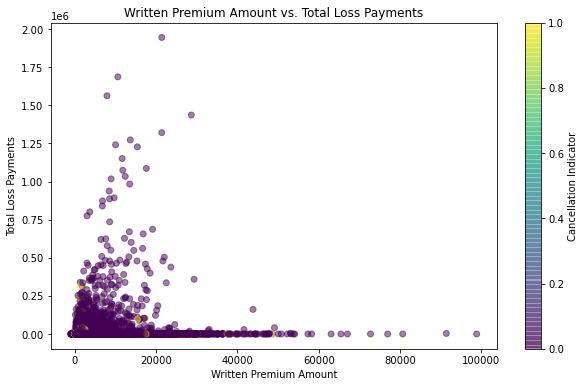

Written Premium Total: 180240321
Written Premium Canceled: 4987624


In [44]:
# Creating a scatter plot of Written Premium Amount vs. Total Loss Payments
plt.figure(figsize=(10, 6))
plt.scatter(df['Written Premium Amount'], df['Total Loss Payments'], c=df['Cancellation_Indicator'], cmap='viridis', alpha=0.5)
plt.xlabel('Written Premium Amount')
plt.ylabel('Total Loss Payments')
plt.title('Written Premium Amount vs. Total Loss Payments')
plt.colorbar(label='Cancellation Indicator')
plt.show()

# Calculating the written premium total and written premium canceled
written_premium_total = df['Written Premium Amount'].sum()
written_premium_canceled = df.loc[df['Cancellation_Indicator'] == 1, 'Written Premium Amount'].sum()

print('Written Premium Total:', written_premium_total)
print('Written Premium Canceled:', written_premium_canceled)

The above scatter plot shows the relationship between 'Written Premium Amount' and 'Total Loss Payments'. This scatter plot can help you visualize the correlation between the premium amounts and the loss payments for each policy, potentially revealing patterns or trends related to cancellations. 

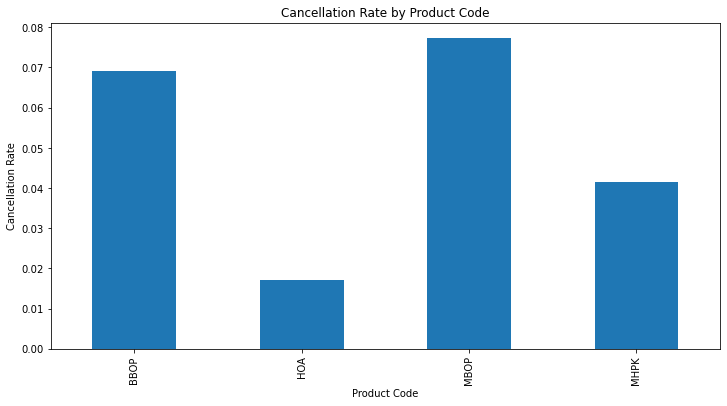

In [45]:
# Calculating the cancellation rates by product code
cancellation_rate_by_product = df.groupby('Product Code')['Cancellation_Indicator'].mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
cancellation_rate_by_product.plot(kind='bar')
plt.xlabel('Product Code')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Product Code')
plt.show()

This bar chart shows the cancellation rate by product code. This visualization can reveal patterns or trends related to specific product lines, which could be helpful in understanding the factors that influence cancellations and improve customer retention strategies. 
This visualization can provide insights into the specific product lines that have higher or lower cancellation rates, allowing you to focus on improving the products or customer segments that need more attention.  As we can see here, MBOP and BBOP products have the highest potential for investigation.  

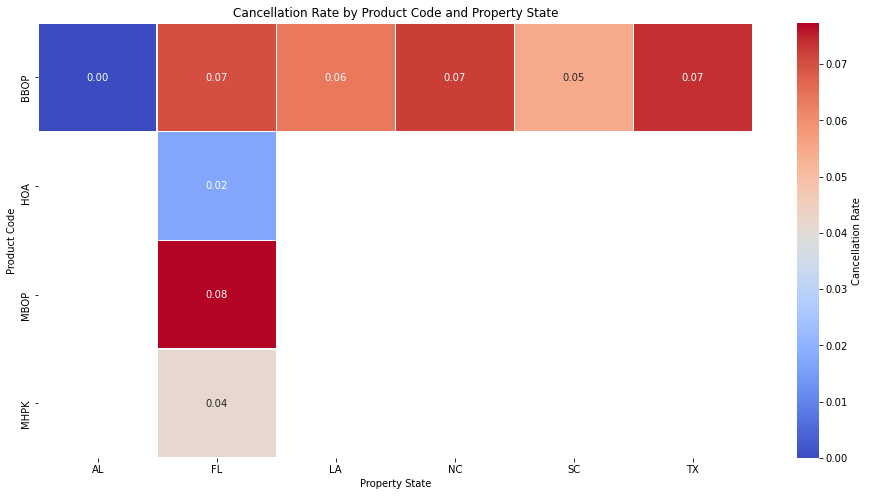

In [46]:
# Calculating the cancellation rates by product code and property state
cancellation_rate_by_product_state = df.groupby(['Product Code', 'Property State'])['Cancellation_Indicator'].mean().unstack()

# Plotting the data in a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(cancellation_rate_by_product_state, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'label': 'Cancellation Rate'})
plt.xlabel('Property State')
plt.ylabel('Product Code')
plt.title('Cancellation Rate by Product Code and Property State')
plt.show()

This heatmap is displaying the cancellation rate across different product codes and property states. This visualization can help you identify geographic trends in cancellations as well as any interactions between product code and location.
This visualization can help you understand the cancellation patterns across different product lines and locations, allowing you to focus on specific combinations of product codes and property states that exhibit higher cancellation rates. This insight can guide targeted improvements in products or customer segments, ultimately contributing to better customer retention.

From the graphical analysis above we can conclude that the focus of the datasets should be in the states of Florida and Louisiana. The cancelation rates are highest amongest the MBOP and BBOP prodcut lines.  Which is understandable since a large majority of the policies sold are in these lines. 

**Milestone 2**

Upon completeing the original EDA in Milestone 1, I concluded that I will focus on the policies that were canceled.   

In [47]:
# Filtering the DataFrame df to only include rows where the 'Canellcation_Indicator' is '1' (yes) = canceled 
# prior to expiration. 

df = df[df['Cancellation_Indicator'] == 1]
df

,Policy Label,Effective Date,Expiration Date,Cancellation Date,Product Code,Subline Code,Street Address 1,Property City,Property County Name,Property Zip Code,Property State,Written Premium Amount,Total Loss Payments,Total Reserve,Cancellation_Indicator
56,09-0004991548-8-07,2020-01-01,2021-01-01,2020-02-01,BBOP,BPOP,1282 US HIGHWAY 1 STE 1,ROCKLEDGE,BREVARD,32955,FL,110,0.0,0.0,1
61,09-0004991687-6-07,2020-01-01,2021-01-01,2020-07-22,BBOP,BPOP,3179 4TH ST N,ST PETERSBURG,PINELLAS,33704,FL,731,0.0,0.0,1
83,09-0005801748-9-05,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,2203 N LOIS AVE STE 961,TAMPA,HILLSBOROUGH,33607,FL,180,0.0,0.0,1
102,09-0005801748-9-05,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,2203 N LOIS AVE STE 932,TAMPA,HILLSBOROUGH,33607,FL,155,0.0,0.0,1
117,09-0005806028-3-04,2020-01-01,2021-01-01,2020-06-18,BBOP,BPOP,7000 W PALMETTO PARK RD STE,BOCA RATON,PALM BEACH,33433,FL,62,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68234,09-0005816483-7-02,2023-03-30,2024-03-30,2023-03-30,BBOP,MAIN,10015 TRINITY BLVD STE 101,TRINITY,PASCO,34655,FL,0,0.0,0.0,1
68485,09-0037792044-6-00,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,3021 MANATEE AVE W,BRADENTON,MANATEE,34205,FL,7260,0.0,0.0,1
68495,09-0037792044-6-00,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,3027 MANATEE AVE W,BRADENTON,MANATEE,34205,FL,5766,0.0,0.0,1
68728,09-0037792052-1-00,2023-04-07,2024-04-07,2023-04-07,MBOP,NRES,1720 DUNLAWTON AVE,PORT ORANGE,VOLUSIA,32127,FL,0,0.0,0.0,1


In [48]:
# Remove the 'Policy Label' and 'Street Address 1' and 'Property City' columns from the DataFrame
# This simplifies the dataset by excluding columns that are not relevant to the analysis since we have county, 
# zip code and state

df = df.drop(['Policy Label','Street Address 1', 'Property City'], axis=1)
df

,Effective Date,Expiration Date,Cancellation Date,Product Code,Subline Code,Property County Name,Property Zip Code,Property State,Written Premium Amount,Total Loss Payments,Total Reserve,Cancellation_Indicator
56,2020-01-01,2021-01-01,2020-02-01,BBOP,BPOP,BREVARD,32955,FL,110,0.0,0.0,1
61,2020-01-01,2021-01-01,2020-07-22,BBOP,BPOP,PINELLAS,33704,FL,731,0.0,0.0,1
83,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,HILLSBOROUGH,33607,FL,180,0.0,0.0,1
102,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,HILLSBOROUGH,33607,FL,155,0.0,0.0,1
117,2020-01-01,2021-01-01,2020-06-18,BBOP,BPOP,PALM BEACH,33433,FL,62,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68234,2023-03-30,2024-03-30,2023-03-30,BBOP,MAIN,PASCO,34655,FL,0,0.0,0.0,1
68485,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,MANATEE,34205,FL,7260,0.0,0.0,1
68495,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,MANATEE,34205,FL,5766,0.0,0.0,1
68728,2023-04-07,2024-04-07,2023-04-07,MBOP,NRES,VOLUSIA,32127,FL,0,0.0,0.0,1


In [49]:
# Calculate the loss ratio for each policy by dividing 'Total Loss Amount' by 
# 'Written Premium Amount'

df['Total Loss Amount'] = df['Total Loss Payments'] + df['Total Reserve']
df['Loss_Ratio'] = df['Total Loss Amount'] / df['Written Premium Amount']
df['Loss_Ratio'] = df['Loss_Ratio'].fillna(0)

The loss ratio is a useful metric in insurance as it helps measure the profitability of an insurance company's policies.

In [50]:
# Calculate the difference between 'Effective Date' and 'Cancellation Date'
df['Cancel Date Difference Days'] = (df['Cancellation Date'] - df['Effective Date']).dt.days

# Convert the difference to months and store it in a new column named 'Months Between'
df['Cancel Months Between'] = df['Cancel Date Difference Days'] / 30.44

# Display the updated DataFrame with the new 'Months Between' column
df

,Effective Date,Expiration Date,Cancellation Date,Product Code,Subline Code,Property County Name,Property Zip Code,Property State,Written Premium Amount,Total Loss Payments,Total Reserve,Cancellation_Indicator,Total Loss Amount,Loss_Ratio,Cancel Date Difference Days,Cancel Months Between
56,2020-01-01,2021-01-01,2020-02-01,BBOP,BPOP,BREVARD,32955,FL,110,0.0,0.0,1,0.0,0.0,31,1.018397
61,2020-01-01,2021-01-01,2020-07-22,BBOP,BPOP,PINELLAS,33704,FL,731,0.0,0.0,1,0.0,0.0,203,6.668857
83,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,HILLSBOROUGH,33607,FL,180,0.0,0.0,1,0.0,0.0,91,2.989488
102,2020-01-01,2021-01-01,2020-04-01,BBOP,MAIN,HILLSBOROUGH,33607,FL,155,0.0,0.0,1,0.0,0.0,91,2.989488
117,2020-01-01,2021-01-01,2020-06-18,BBOP,BPOP,PALM BEACH,33433,FL,62,0.0,0.0,1,0.0,0.0,169,5.551905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68234,2023-03-30,2024-03-30,2023-03-30,BBOP,MAIN,PASCO,34655,FL,0,0.0,0.0,1,0.0,0.0,0,0.000000
68485,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,MANATEE,34205,FL,7260,0.0,0.0,1,0.0,0.0,38,1.248357
68495,2023-04-01,2024-04-01,2023-05-09,MBOP,NRES,MANATEE,34205,FL,5766,0.0,0.0,1,0.0,0.0,38,1.248357
68728,2023-04-07,2024-04-07,2023-04-07,MBOP,NRES,VOLUSIA,32127,FL,0,0.0,0.0,1,0.0,0.0,0,0.000000


In [51]:
# Check for missing (NA) values in each column of the DataFrame

df_nan = pd.DataFrame({'Column' : df.columns, 'Percent': df.isnull().sum() / len(df)})
df_nan

,Column,Percent
Effective Date,Effective Date,0.0
Expiration Date,Expiration Date,0.0
Cancellation Date,Cancellation Date,0.0
Product Code,Product Code,0.0
Subline Code,Subline Code,0.0
Property County Name,Property County Name,0.0
Property Zip Code,Property Zip Code,0.0
Property State,Property State,0.0
Written Premium Amount,Written Premium Amount,0.0
Total Loss Payments,Total Loss Payments,0.0


In [52]:
# Check the data types of each column in the DataFrame 
# This helps identify categorical columns that may need to be converted to dummy variables

df.dtypes

Effective Date                 datetime64[ns]
Expiration Date                datetime64[ns]
Cancellation Date              datetime64[ns]
Product Code                           object
Subline Code                           object
Property County Name                   object
Property Zip Code                       int64
Property State                         object
Written Premium Amount                  int64
Total Loss Payments                   float64
Total Reserve                         float64
Cancellation_Indicator                  int32
Total Loss Amount                     float64
Loss_Ratio                            float64
Cancel Date Difference Days             int64
Cancel Months Between                 float64
dtype: object

In [53]:
# Drop the specified columns
df = df.drop(columns=['Effective Date','Expiration Date','Cancellation Date','Cancellation_Indicator','Property County Name', 'Cancel Months Between'])
# Display the updated DataFrame without the dropped columns
df

,Product Code,Subline Code,Property Zip Code,Property State,Written Premium Amount,Total Loss Payments,Total Reserve,Total Loss Amount,Loss_Ratio,Cancel Date Difference Days
56,BBOP,BPOP,32955,FL,110,0.0,0.0,0.0,0.0,31
61,BBOP,BPOP,33704,FL,731,0.0,0.0,0.0,0.0,203
83,BBOP,MAIN,33607,FL,180,0.0,0.0,0.0,0.0,91
102,BBOP,MAIN,33607,FL,155,0.0,0.0,0.0,0.0,91
117,BBOP,BPOP,33433,FL,62,0.0,0.0,0.0,0.0,169
...,...,...,...,...,...,...,...,...,...,...
68234,BBOP,MAIN,34655,FL,0,0.0,0.0,0.0,0.0,0
68485,MBOP,NRES,34205,FL,7260,0.0,0.0,0.0,0.0,38
68495,MBOP,NRES,34205,FL,5766,0.0,0.0,0.0,0.0,38
68728,MBOP,NRES,32127,FL,0,0.0,0.0,0.0,0.0,0


In [54]:
float_cols = ['Total Loss Payments', 'Total Reserve', 'Loss_Ratio']

for col in float_cols:
    df[col] = df[col].round(2)


In [55]:
# Check the data types of each column in the DataFrame 
# This helps identify categorical columns that may need to be converted to dummy variables

df.dtypes

Product Code                    object
Subline Code                    object
Property Zip Code                int64
Property State                  object
Written Premium Amount           int64
Total Loss Payments            float64
Total Reserve                  float64
Total Loss Amount              float64
Loss_Ratio                     float64
Cancel Date Difference Days      int64
dtype: object

In [56]:
# Display the column names of the DataFrame 

df.columns

Index(['Product Code', 'Subline Code', 'Property Zip Code', 'Property State',
       'Written Premium Amount', 'Total Loss Payments', 'Total Reserve',
       'Total Loss Amount', 'Loss_Ratio', 'Cancel Date Difference Days'],
      dtype='object')

In [57]:
# Convert categorical variables in the DataFrame into dummy variables
# This is also known as one-hot encoding, which creates new binary columns for each unique value in the 
# categorical columns
df = pd.get_dummies(df)

# Display the updated DataFrame with the dummy variables
df

,Property Zip Code,Written Premium Amount,Total Loss Payments,Total Reserve,Total Loss Amount,Loss_Ratio,Cancel Date Difference Days,Product Code_BBOP,Product Code_HOA,Product Code_MBOP,...,Subline Code_MAIN,Subline Code_NRES,Subline Code_NRMH,Subline Code_NSBG,Subline Code_ROMH,Property State_FL,Property State_LA,Property State_NC,Property State_SC,Property State_TX
56,32955,110,0.0,0.0,0.0,0.0,31,1,0,0,...,0,0,0,0,0,1,0,0,0,0
61,33704,731,0.0,0.0,0.0,0.0,203,1,0,0,...,0,0,0,0,0,1,0,0,0,0
83,33607,180,0.0,0.0,0.0,0.0,91,1,0,0,...,1,0,0,0,0,1,0,0,0,0
102,33607,155,0.0,0.0,0.0,0.0,91,1,0,0,...,1,0,0,0,0,1,0,0,0,0
117,33433,62,0.0,0.0,0.0,0.0,169,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68234,34655,0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
68485,34205,7260,0.0,0.0,0.0,0.0,38,0,0,1,...,0,1,0,0,0,1,0,0,0,0
68495,34205,5766,0.0,0.0,0.0,0.0,38,0,0,1,...,0,1,0,0,0,1,0,0,0,0
68728,32127,0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


**Milestone 3**

In [58]:
# Creating a correlation matrix to identify realtionships. 

correlation = df.corr()
correlation

,Property Zip Code,Written Premium Amount,Total Loss Payments,Total Reserve,Total Loss Amount,Loss_Ratio,Cancel Date Difference Days,Product Code_BBOP,Product Code_HOA,Product Code_MBOP,...,Subline Code_MAIN,Subline Code_NRES,Subline Code_NRMH,Subline Code_NSBG,Subline Code_ROMH,Property State_FL,Property State_LA,Property State_NC,Property State_SC,Property State_TX
Property Zip Code,1.000000,0.074139,0.098505,0.001572,0.092821,0.070750,0.015964,0.096044,-0.039446,-0.083433,...,0.108228,-0.083433,-0.020873,-0.033180,-0.006942,-0.768239,0.944738,-0.156840,-0.079103,0.278311
Written Premium Amount,0.074139,1.000000,0.067000,0.063978,0.083219,0.006498,0.334575,-0.045161,0.001188,0.029760,...,0.046456,0.029760,0.051833,-0.023085,0.069200,-0.060944,0.071572,-0.003955,-0.007251,0.017529
Total Loss Payments,0.098505,0.067000,1.000000,0.032947,0.947720,0.739891,0.045489,0.007168,-0.006500,-0.003799,...,0.026606,-0.003799,-0.003659,-0.005501,-0.001292,-0.079005,0.104231,-0.012471,-0.007415,-0.005801
Total Reserve,0.001572,0.063978,0.032947,1.000000,0.350155,0.094586,0.015415,-0.005116,-0.002117,0.007252,...,-0.021776,0.007252,-0.001170,-0.001759,-0.000413,0.002158,0.001191,-0.004076,-0.002371,-0.001855
Total Loss Amount,0.092821,0.083219,0.947720,0.350155,1.000000,0.723623,0.047554,0.005084,-0.006768,-0.001245,...,0.017982,-0.001245,-0.003803,-0.005717,-0.001343,-0.073354,0.098066,-0.012989,-0.007706,-0.006029
Loss_Ratio,0.070750,0.006498,0.739891,0.094586,0.723623,1.000000,0.015202,-0.001755,-0.005852,0.005923,...,0.022868,0.005923,-0.003242,-0.004874,-0.001145,-0.055513,0.075192,-0.010746,-0.006570,-0.005140
Cancel Date Difference Days,0.015964,0.334575,0.045489,0.015415,0.047554,0.015202,1.000000,0.092356,-0.027607,-0.093494,...,0.065202,-0.093494,0.006403,-0.030595,0.001431,-0.022425,0.030791,0.004579,0.009699,-0.038309
Product Code_BBOP,0.096044,-0.045161,0.007168,-0.005116,0.005084,-0.001755,0.092356,1.000000,-0.413884,-0.863137,...,0.361912,-0.863137,-0.228689,-0.343776,-0.080732,-0.125174,0.098949,0.052526,0.030553,0.023903
Product Code_HOA,-0.039446,0.001188,-0.006500,-0.002117,-0.006768,-0.005852,-0.027607,-0.413884,1.000000,-0.023554,...,-0.149790,-0.023554,-0.006241,0.830608,-0.002203,0.051808,-0.040953,-0.021740,-0.012646,-0.009893
Product Code_MBOP,-0.083433,0.029760,-0.003799,0.007252,-0.001245,0.005923,-0.093494,-0.863137,-0.023554,1.000000,...,-0.312379,1.000000,-0.013015,-0.019564,-0.004594,0.108042,-0.085407,-0.045337,-0.026372,-0.020632


In [59]:
# Cancel Date correlation

correlation['Cancel Date Difference Days']

Property Zip Code              0.015964
Written Premium Amount         0.334575
Total Loss Payments            0.045489
Total Reserve                  0.015415
Total Loss Amount              0.047554
Loss_Ratio                     0.015202
Cancel Date Difference Days    1.000000
Product Code_BBOP              0.092356
Product Code_HOA              -0.027607
Product Code_MBOP             -0.093494
Product Code_MHPK              0.006516
Subline Code_ARPT             -0.002662
Subline Code_BLDG             -0.003782
Subline Code_BPOP             -0.020461
Subline Code_COND             -0.022842
Subline Code_ISO               0.010624
Subline Code_MAIN              0.065202
Subline Code_NRES             -0.093494
Subline Code_NRMH              0.006403
Subline Code_NSBG             -0.030595
Subline Code_ROMH              0.001431
Property State_FL             -0.022425
Property State_LA              0.030791
Property State_NC              0.004579
Property State_SC              0.009699


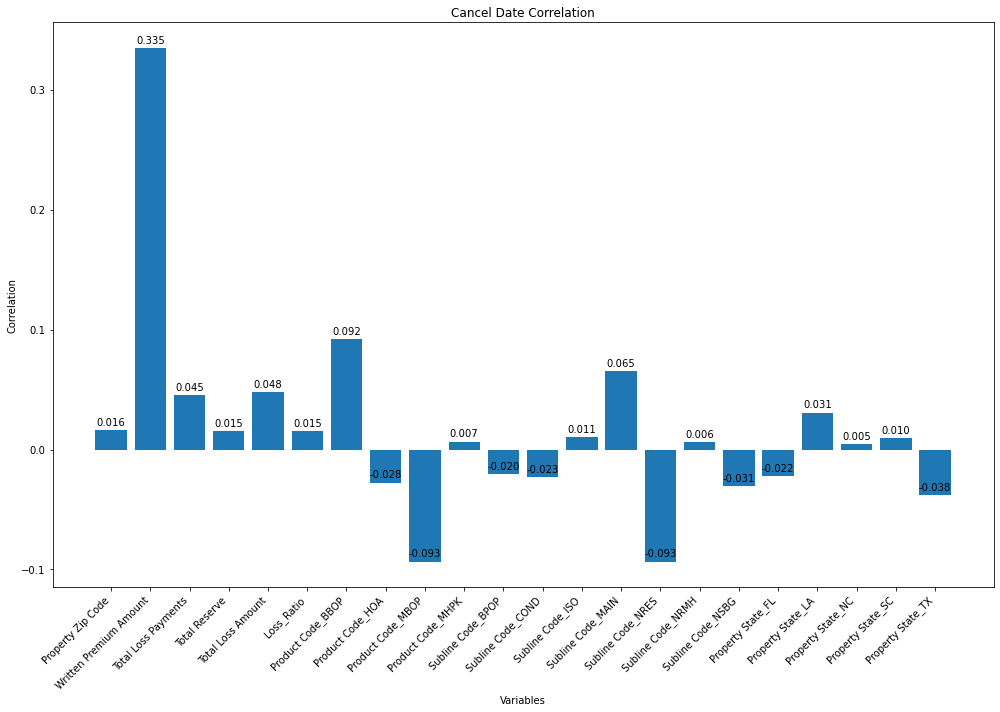

In [79]:
correlation = pd.Series({
    'Property Zip Code': 0.015964,
    'Written Premium Amount': 0.334575,
    'Total Loss Payments': 0.045489,
    'Total Reserve': 0.015415,
    'Total Loss Amount': 0.047554,
    'Loss_Ratio': 0.015202,
    'Product Code_BBOP': 0.092356,
    'Product Code_HOA': -0.027607,
    'Product Code_MBOP': -0.093494,
    'Product Code_MHPK': 0.006516,
    'Subline Code_BPOP': -0.020461,
    'Subline Code_COND': -0.022842,
    'Subline Code_ISO': 0.010624,
    'Subline Code_MAIN': 0.065202,
    'Subline Code_NRES': -0.093494,
    'Subline Code_NRMH': 0.006403,
    'Subline Code_NSBG': -0.030595,
    'Property State_FL': -0.022425,
    'Property State_LA': 0.030791,
    'Property State_NC': 0.004579,
    'Property State_SC': 0.009699,
    'Property State_TX': -0.038309
})

# Creating the bar graph
plt.figure(figsize=(14, 10))  
bars = plt.bar(correlation.index, correlation.values)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Cancel Date Correlation')

# Adjusting the x-axis labels for proper alignment
plt.xticks(rotation=45, ha='right')

# Function to add labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adding labels to the bars
autolabel(bars)

plt.tight_layout()
plt.show()

'Cancel Date Difference Days' has the highest positive correlation (0.335) with the 'Written Premium Amount'. This indicates that as the 'Written Premium Amount' increases, the length of time until a policy is cancelled also tends to increase. 'Total Loss Amount' and 'Product Code_BBOP' also show weak positive correlations of 0.048 and 0.092, respectively.

Conversely, there are factors like 'Product Code_HOA' and 'Product Code_MBOP' that exhibit weak negative correlations of -0.028 and -0.093, respectively. The correlations for various 'Subline Codes' and 'Property States' range from very weak negative to weak positive, indicating a lack of strong linear relationships between these factors and 'Cancel Date Difference Days'.

In [61]:
# Drop the specified columns as they are not needed

df = df.drop(columns=['Loss_Ratio','Property State_NC', 'Property State_SC', 'Subline Code_ROMH', 
                      'Subline Code_ARPT', 'Subline Code_NRMH'])

In [62]:
# Cancel Date Difference Days is target variable

X = df.drop('Cancel Date Difference Days', axis=1) # Features
y = df['Cancel Date Difference Days'] # Target variable

In [63]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print('Training data shape:')
print(X_train.shape)
print(y_train.shape)
print('\nTesting data shape:')
print(X_test.shape)
print(y_test.shape)

Training data shape:
(3724, 19)
(3724,)

Testing data shape:
(932, 19)
(932,)


I will first run a linear regression model to assess the intial performance and gain insights into the relationships between variables before exploring more complex modeling techniques.

In [64]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predicting the training dataset 
y_predict_train = model.predict(X_train) 

In [66]:
# Calculating R2, RMSE and MAE for the training set
r2_train = r2_score(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
mae_train = mean_absolute_error(y_train, y_predict_train)

print('Training data R2, RMSE, MAE:')
print(f'R2: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')

Training data R2, RMSE, MAE:
R2: 0.1281354607918873
RMSE: 100.80555402420825
MAE: 84.30556881731694


In [67]:
# Predicting the test dataset 
y_predict_test = model.predict(X_test) 

# Calculating R2, RMSE and MAE for the test set
r2_test = r2_score(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
mae_test = mean_absolute_error(y_test, y_predict_test)

print('Test data R2, RMSE, MAE:')
print(f'R2: {r2_test}')
print(f'RMSE: {rmse_test}')
print(f'MAE: {mae_test}')

Test data R2, RMSE, MAE:
R2: 0.04869079546943145
RMSE: 104.22555587997634
MAE: 84.33839530373024


Based on these metrics, it appears that the linear regression model may not be capturing the underlying patterns in the data very well. The R2 values are relatively low, indicating that the model explains only a small portion of the variance in the target variable. Additionally, the RMSE and MAE values are relatively high, suggesting that the model's predictions have a significant average error.

Expirimenting with other models to get best fit. 

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predicting the training dataset
y_predict_train = model.predict(X_train)

# Calculate R2, RMSE, and MAE for the training set
r2_train = r2_score(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
mae_train = mean_absolute_error(y_train, y_predict_train)

# Print training set performance metrics
print('Training data R2, RMSE, MAE:')
print(f'R2: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')

# Predicting the test dataset
y_predict_test = model.predict(X_test)

# Calculate R2, RMSE, and MAE for the test set
r2_test = r2_score(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
mae_test = mean_absolute_error(y_test, y_predict_test)

# Print test set performance metrics
print('Test data R2, RMSE, MAE:')
print(f'R2: {r2_test}')
print(f'RMSE: {rmse_test}')
print(f'MAE: {mae_test}')


Training data R2, RMSE, MAE:
R2: 0.9997617960517985
RMSE: 1.666228012450182
MAE: 0.06015037593984962
Test data R2, RMSE, MAE:
R2: -0.05207293066791996
RMSE: 109.60649597185136
MAE: 78.2043991416309


The high R2 value (close to 1) and low RMSE and MAE values for the training data indicate that the decision tree model fits the training data very well. However, the negative R2 value and relatively high RMSE and MAE values for the test data suggest that the model does not generalize well to unseen data. This indicates potential overfitting, where the model has learned the training data too well and does not perform well on new data.

Adjusting hyperparameters in the decision tree model.

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Initialize a new model with the best hyperparameters
best_model = DecisionTreeRegressor(random_state=42, **best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model's performance
r2_best = r2_score(y_test, y_pred_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_best = mean_absolute_error(y_test, y_pred_test)

print('Best Model Performance:')
print(f'R2: {r2_best}')
print(f'RMSE: {rmse_best}')
print(f'MAE: {mae_best}')


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Model Performance:
R2: 0.46985001203827836
RMSE: 77.80593904371312
MAE: 58.124266892072825


These metrics indicate that the model with tuned hyperparameters performs better than the previous model. The R2 score of 0.47 suggests that the model explains 47% of the variance in the target variable. The lower values of RMSE and MAE indicate smaller prediction errors.

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predicting the training dataset
y_predict_train = model.predict(X_train)

# Calculating R2, RMSE, and MAE for the training set
r2_train = r2_score(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
mae_train = mean_absolute_error(y_train, y_predict_train)

print('Training data R2, RMSE, MAE:')
print(f'R2: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')

# Predicting the test dataset
y_predict_test = model.predict(X_test)

# Calculating R2, RMSE, and MAE for the test set
r2_test = r2_score(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
mae_test = mean_absolute_error(y_test, y_predict_test)

print('Test data R2, RMSE, MAE:')
print(f'R2: {r2_test}')
print(f'RMSE: {rmse_test}')
print(f'MAE: {mae_test}')


Training data R2, RMSE, MAE:
R2: 0.9192363650297426
RMSE: 30.680884965184404
MAE: 22.669396053910287
Test data R2, RMSE, MAE:
R2: 0.41774800894869635
RMSE: 81.53965354055921
MAE: 59.885281677907216


Overall, the Random Forest model shows good performance on the training data, but there is some drop in performance on the test data. This may indicate a degree of overfitting, where the model is capturing the training data patterns too closely and not generalizing well to new data. Further optimization or tuning of the model parameters could potentially improve its performance on the test data.

Adjusting hyperparameters in the random forest model.

In [71]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest regressor
model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the training data
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Best Model Performance (Training data):")
print(f"R2: {r2_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")

# Evaluate the best model on the test data
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Best Model Performance (Test data):")
print(f"R2: {r2_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Performance (Training data):
R2: 0.5131996887112908
RMSE: 75.32434734086904
MAE: 57.03227118231391
Best Model Performance (Test data):
R2: 0.47818243711817887
RMSE: 77.19207524240134
MAE: 57.37015112400198


The results indicate improved performance compared to the previous iterations.

The best Random Forest model with tuned hyperparameters achieved an R2 score of 0.48 on the test data, indicating that it explains 48% of the variance in the target variable. The RMSE value of 77.19 and MAE value of 57.37 suggest relatively small prediction errors. This model outperformed the previous iterations and shows promise in predicting the "Cancel Date Difference Days" based on the given features.

Incorporating new features can help improve the prediction of cancellation patterns.  I might consider adding more customer related demographics, customer behaviors (payment history), and cancellation reasons to correlate and perform textual analysis.  